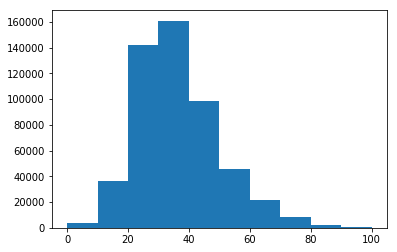

Size of the bucket 15-25 102415
percentage of population between 15 and 25 19.668413006905983
percentage of population who are male and age of 30 1.9369781144134524


In [3]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

imdb_mat = 'imdb_crop/imdb.mat'
wiki_mat = 'wiki_crop/wiki.mat'

imdb_data = loadmat(imdb_mat)
wiki_data = loadmat(wiki_mat)

del imdb_mat, wiki_mat

imdb = imdb_data['imdb']
wiki = wiki_data['wiki']

imdb_photo_taken = imdb[0][0][1][0]
imdb_full_path = imdb[0][0][2][0]
imdb_gender = imdb[0][0][3][0]
imdb_names = imdb[0][0][4][0]
imdb_face_score1 = imdb[0][0][6][0]
imdb_face_score2 = imdb[0][0][7][0]

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_names = wiki[0][0][4][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

imdb_path = []
wiki_path = []

def parse_name(n):
    try:
        return n[0]
    except Exception as ex:
        try:
            return str(n)
        except:
            return None

imdb_names = list(map(parse_name,imdb_names))
wiki_names = list(map(parse_name,wiki_names))

for path in imdb_full_path:
    imdb_path.append('imdb_crop/' + path[0])

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

imdb_genders = []
wiki_genders = []

for n in range(len(imdb_gender)):
    if imdb_gender[n] == 1:
        imdb_genders.append('male')
    else:
        imdb_genders.append('female')

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

imdb_dob = []
wiki_dob = []

for file in imdb_path:
    temp = file.split('_')[3]
    temp = temp.split('-')
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    if len(temp[2]) == 1:
        temp[2] = '0' + temp[2]

    if temp[1] == '00':
        temp[1] = '01'
    if temp[2] == '00':
        temp[2] = '01'
    
    imdb_dob.append('-'.join(temp))

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])


imdb_age = []
wiki_age = []

for i in range(len(imdb_dob)):
    try:
        d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        try:
            d1 = date.datetime.strptime(imdb_dob[i][0:10], '%d-%m-%y')
            d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
            rdelta = relativedelta(d2, d1)
            diff = rdelta.years
        except Exception as ex:
            try:
                d1 = date.datetime.strptime(imdb_dob[i][0:10], '%Y-%d-%m')
                d2 = date.datetime.strptime(str(imdb_photo_taken[i]), '%Y')
                rdelta = relativedelta(d2, d1)
                diff = rdelta.years
            except Exception as ex:
                # print(ex)
                diff = -1
    imdb_age.append(diff)

for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        try:
            d1 = date.datetime.strptime(wiki_dob[i][0:10], '%d-%m-%y')
            d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
            rdelta = relativedelta(d2, d1)
            diff = rdelta.years
        except Exception as ex:
            try:
                d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%d-%m')
                d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
                rdelta = relativedelta(d2, d1)
                diff = rdelta.years
            except Exception as ex:
                # print(ex)
                diff = -1
    wiki_age.append(diff)
imdb = pd.DataFrame(data={'gender': imdb_genders,'age': imdb_age})
wiki = pd.DataFrame(data={'gender': wiki_genders, 'age': wiki_age})
imdb_wiki = imdb.append(wiki)
imdb_wiki_age= imdb_wiki[(imdb_wiki['age'] >= 0) & (imdb_wiki['age'] <= 100)]
n, bins, patches = plt.hist(imdb_wiki_age['age'])
plt.show()
age_15_to_25 = imdb_wiki_age[(imdb_wiki_age['age'] >= 15) & (imdb_wiki_age['age'] <= 25)]
print("Size of the bucket 15-25",len(age_15_to_25))
print("percentage of population between 15 and 25",(len(age_15_to_25)/len(imdb_wiki_age))*100)
age_30_male = imdb_wiki_age[(imdb_wiki_age['gender'] == "male") & (imdb_wiki_age['age'] == 30)]
print("percentage of population who are male and age of 30",(len(age_30_male)/len(imdb_wiki_age))*100)